In [ ]:
import numpy as np
from model import get_model
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 12)

Using TensorFlow backend.


NameError: name 'matplotlib' is not defined

In [2]:
# load image patches. There are 3 images, 15 patches per image, so 45 input images in total
image_patches = np.load('./data/test/patches.npy')
image_patches = image_patches / 255.
input_shape = image_patches.shape[1:]

# load true counts
true_counts = np.load('./data/test/patch_counts.npy')

In [4]:
# Create a model
model = get_model('qgodeep')
predictor = model.model_for_prediction(input_shape)

# Load model weights that have beed saved after completing training
predictor.load_weights('./out/qgodeep.94.hdf5')

# Make oredictions
predictions = predictor.predict(image_patches)

In [193]:
font = ImageFont.truetype('calibri.ttf', 20)

labeled_patches = np.empty_like(image_patches, dtype=np.uint8)

for i, (patch, true_count, predicted_count) in enumerate(zip(image_patches, true_counts, predictions)):
    labeled_patch = Image.fromarray(np.uint8(patch * 255))
    draw = ImageDraw.Draw(labeled_patch)
    true_count = int(round(true_count))
    predicted_count = int(round(predicted_count[0]))
    draw.rectangle(((5, 230), (180, 260)), fill="black")
    draw.text((10, 230), 'true:predicted {}:{}'.format(true_count, predicted_count), (255, 255, 255), font=font)
    draw.line(((0,0), (0, 255)), fill="red", width=3)
    draw.line(((0,0), (255, 0)), fill="red", width=3)
    draw.line(((0,255), (255, 255)), fill="red", width=3)
    draw.line(((255,0), (255, 255)), fill="red", width=3)
    
    labeled_patches[i] = labeled_patch

True:		176 
Predicted:	260 
Difference:	84


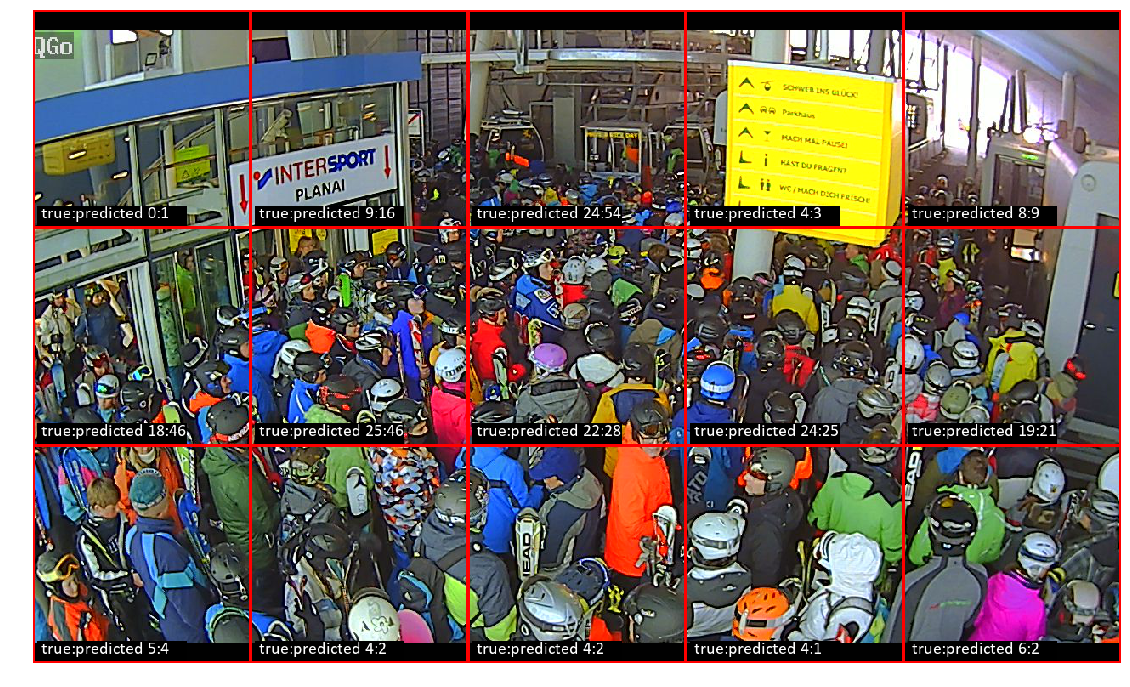

True:		32 
Predicted:	63 
Difference:	31


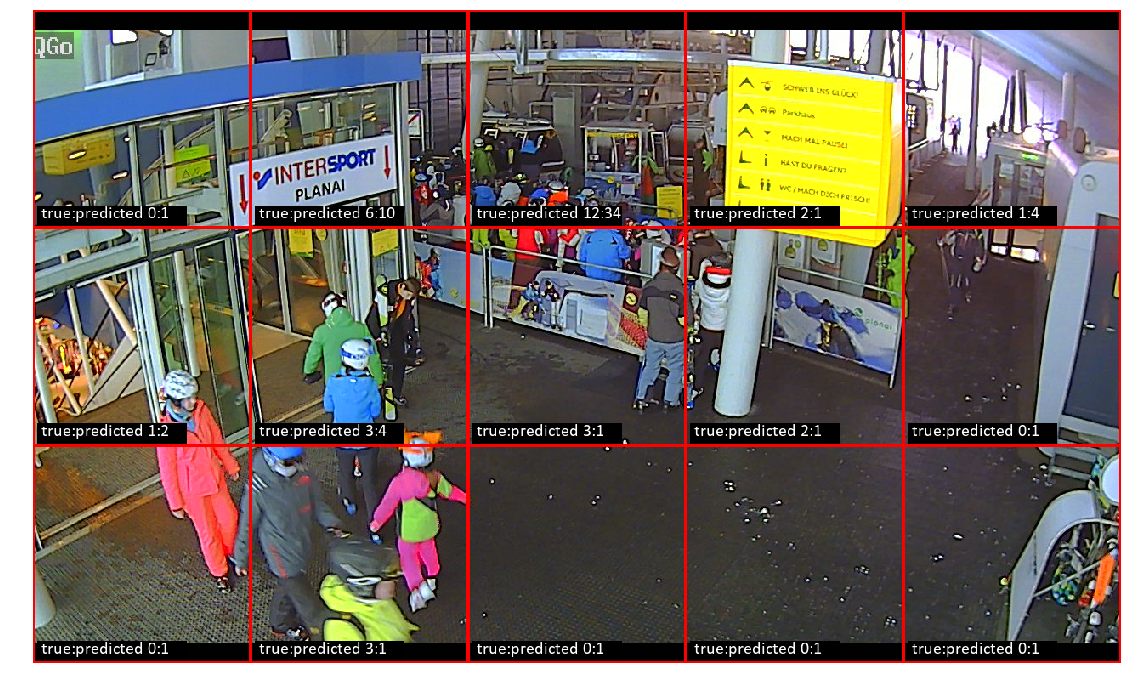

True:		33 
Predicted:	75 
Difference:	42


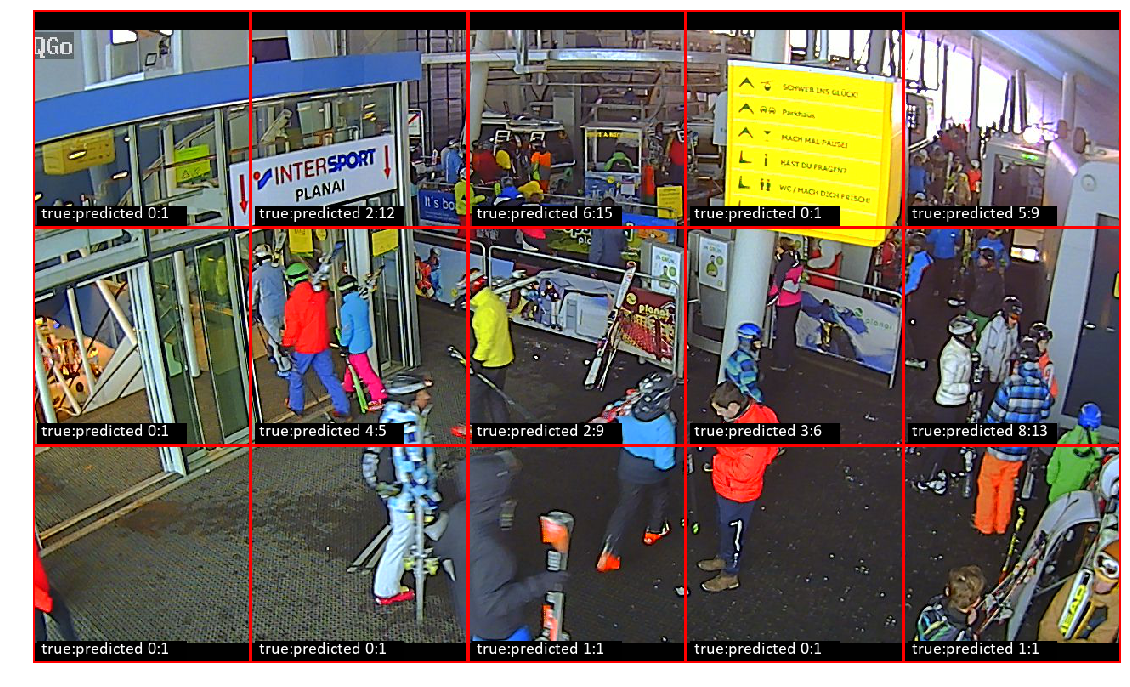

In [212]:
for i in range(3):
    im = labeled_patches[i * 15: (i + 1) * 15, :, :, :]
    labeled_image = np.concatenate((np.concatenate((im[0:5, :, :, :]), axis=1),
                       np.concatenate((im[5:10, :, :, :]), axis=1),
                       np.concatenate((im[10:15, :, :, :]), axis=1))) 
    true_count = int(round(true_counts[i * 15: (i + 1) * 15].sum()))
    predicted_count = int(round(predictions[i * 15: (i + 1) * 15].sum()))
    print('True:\t\t{} \nPredicted:\t{} \nDifference:\t{}'.format(true_count, predicted_count, abs(true_count - predicted_count)))
    plt.imshow(labeled_image)
    plt.axis('off')
    plt.show()